### AN ANALYSIS OF STUDENTS EXAM SCORES

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
students_exam_scores = pd.read_csv('Expanded_data_with_more_features.csv')

In [7]:
#creating a copy of my data
df = students_exam_scores.copy()

In [8]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [9]:
#overview of my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


### Data Cleaning
#### From our data info, we can see that the data is not complete, there are missing data; so I will be performing data cleaning so I can have a neat and complete data to perform my analysis.

In [10]:
df.isnull()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30637,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30638,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
30639,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [12]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [13]:
# Droping of NrSibling and TransportMeans because they are irrelevant to our analysis
drop_columns = ['NrSiblings', 'TransportMeans']

In [14]:
df2 = df.drop(drop_columns, axis=1)

In [15]:
df2.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,5 - 10,76,78,75


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           30641 non-null  int64 
 1   Gender               30641 non-null  object
 2   EthnicGroup          28801 non-null  object
 3   ParentEduc           28796 non-null  object
 4   LunchType            30641 non-null  object
 5   TestPrep             28811 non-null  object
 6   ParentMaritalStatus  29451 non-null  object
 7   PracticeSport        30010 non-null  object
 8   IsFirstChild         29737 non-null  object
 9   WklyStudyHours       29686 non-null  object
 10  MathScore            30641 non-null  int64 
 11  ReadingScore         30641 non-null  int64 
 12  WritingScore         30641 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.0+ MB


In [17]:
df2.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [18]:
# Replacing missing values of WklyStudyHours with the mode
mode_WklyStudyHours = df2['WklyStudyHours'].mode()
mode_WklyStudyHours

0    5 - 10
Name: WklyStudyHours, dtype: object

In [19]:
df3 = df2.copy()

In [20]:
df3['WklyStudyHours'] = df2['WklyStudyHours'].fillna('5 - 10', inplace=False)

In [21]:
# Replacing missing values of EthnicGroup with the average mode
df4 = df3.copy()
average = df4['EthnicGroup'].mode()
average

0    group C
Name: EthnicGroup, dtype: object

In [22]:
df4['EthnicGroup'].fillna('group C', inplace=True)

In [23]:
# Replacing missing values of ParentEduc with the average mode
df5 = df4.copy()
average = df5['ParentEduc'].mode()
average

0    some college
Name: ParentEduc, dtype: object

In [24]:
df5['ParentEduc'].fillna('some college', inplace=True)

In [25]:
# Replacing missing values of TestPrep with the average mode
df6 = df5.copy()
average = df6['TestPrep'].mode()
average

0    none
Name: TestPrep, dtype: object

In [26]:
df6['TestPrep'].fillna('none', inplace=True)

In [27]:
# Replacing missing values of ParentMaritalStatus with the average mode
df7 = df6.copy()
average = df7['ParentMaritalStatus'].mode()
average

0    married
Name: ParentMaritalStatus, dtype: object

In [28]:
df7['ParentMaritalStatus'].fillna('married', inplace=True)

In [29]:
# Replacing missing values of IsFirstChild with the average mode
df8 = df7.copy()
average = df8['IsFirstChild'].mode()
average

0    yes
Name: IsFirstChild, dtype: object

In [30]:
df8['IsFirstChild'].fillna('yes', inplace=True)

In [31]:
# Replacing missing values of PracticeSport with the average mode
df9 = df8.copy()
average = df9['PracticeSport'].mode()
average

0    sometimes
Name: PracticeSport, dtype: object

In [32]:
df9['PracticeSport'].fillna('sometimes', inplace=True)

In [33]:
df9.isnull().sum()

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [34]:
neat_data = df9.copy()

In [35]:
neat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           30641 non-null  int64 
 1   Gender               30641 non-null  object
 2   EthnicGroup          30641 non-null  object
 3   ParentEduc           30641 non-null  object
 4   LunchType            30641 non-null  object
 5   TestPrep             30641 non-null  object
 6   ParentMaritalStatus  30641 non-null  object
 7   PracticeSport        30641 non-null  object
 8   IsFirstChild         30641 non-null  object
 9   WklyStudyHours       30641 non-null  object
 10  MathScore            30641 non-null  int64 
 11  ReadingScore         30641 non-null  int64 
 12  WritingScore         30641 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.0+ MB


In [36]:
neat_data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,group C,bachelor's degree,standard,none,married,regularly,yes,< 5,71,71,74
1,1,female,group C,some college,standard,none,married,sometimes,yes,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,5 - 10,76,78,75


In [37]:
neat_data.duplicated().sum()

0

In [38]:
neat_data.describe()

,Unnamed: 0,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,66.558402,69.377533,68.418622
std,288.747894,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,249.000000,56.000000,59.000000,58.000000
50%,500.000000,67.000000,70.000000,69.000000
75%,750.000000,78.000000,80.000000,79.000000
max,999.000000,100.000000,100.000000,100.000000


In [39]:
df11 = neat_data.copy()

In [40]:
df11.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [41]:
df11[['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'WklyStudyHours']].describe()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,WklyStudyHours
count,30641,30641,30641,30641,30641,30641,30641,30641,30641
unique,2,5,6,2,2,4,3,2,3
top,female,group C,some college,standard,none,married,sometimes,yes,5 - 10
freq,15424,11052,8478,19905,20686,18034,15844,19986,17201


In [42]:
df11_sub = df11[['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'WklyStudyHours']]

In [43]:
for col in df11_sub.columns:
    print(df11[col].value_counts())
    print("_________")

Gender
female    15424
male      15217
Name: count, dtype: int64
_________
EthnicGroup
group C    11052
group D     7503
group B     5826
group E     4041
group A     2219
Name: count, dtype: int64
_________
ParentEduc
some college          8478
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: count, dtype: int64
_________
LunchType
standard        19905
free/reduced    10736
Name: count, dtype: int64
_________
TestPrep
none         20686
completed     9955
Name: count, dtype: int64
_________
ParentMaritalStatus
married     18034
single       7097
divorced     4919
widowed       591
Name: count, dtype: int64
_________
PracticeSport
sometimes    15844
regularly    10793
never         4004
Name: count, dtype: int64
_________
IsFirstChild
yes    19986
no     10655
Name: count, dtype: int64
_________
WklyStudyHours
5 - 10    17201
< 5        8238
> 10       5202
Name: count, dtype: int64
_________


<Axes: xlabel='Gender', ylabel='count'>

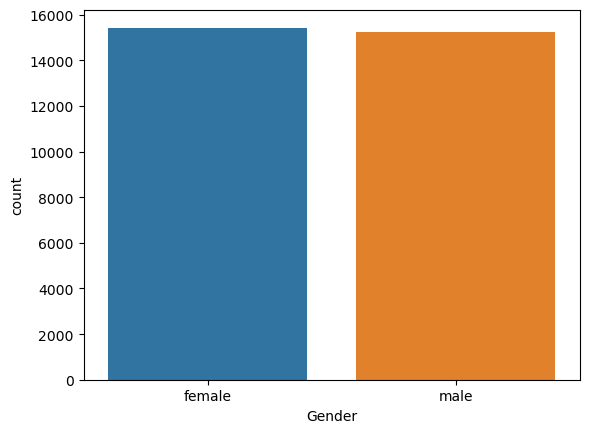

In [44]:
sns.countplot(x='Gender', data=df11)

<Axes: xlabel='EthnicGroup', ylabel='count'>

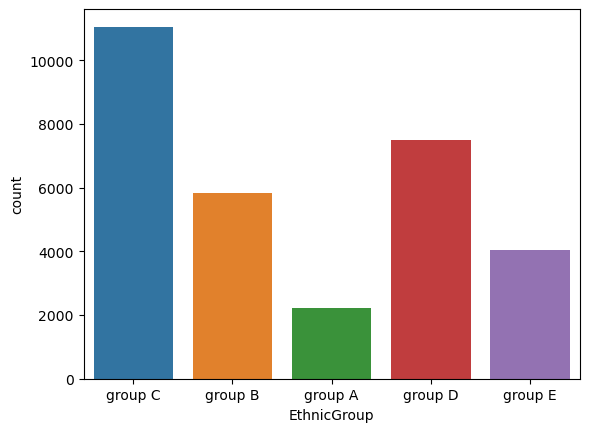

In [45]:
sns.countplot(x='EthnicGroup', data=df11)

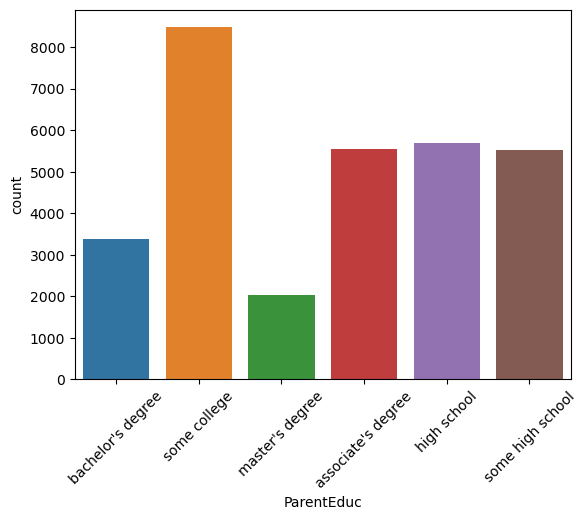

In [46]:
sns.countplot(x='ParentEduc', data=df11)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='LunchType', ylabel='count'>

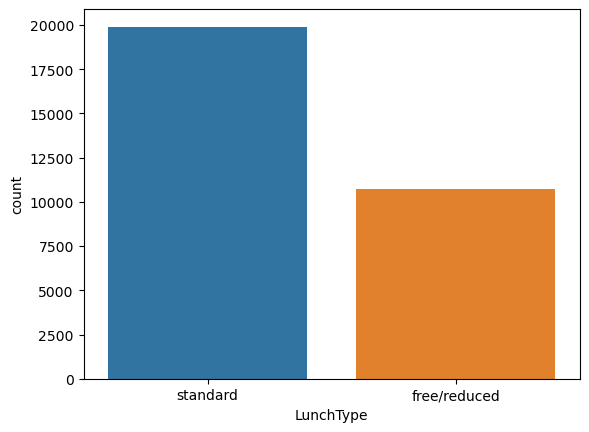

In [47]:
sns.countplot(x='LunchType', data=df11)

<Axes: xlabel='ParentMaritalStatus', ylabel='count'>

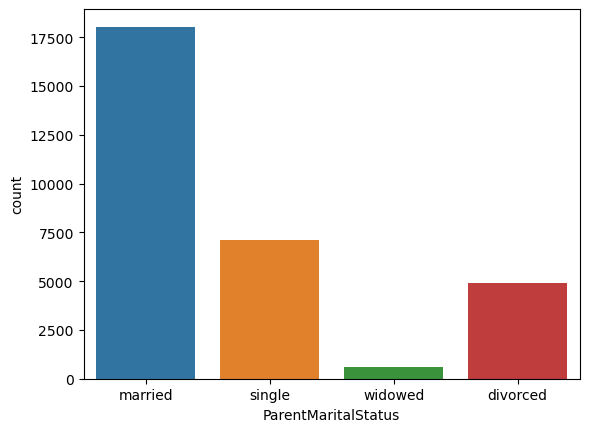

In [48]:
sns.countplot(x='ParentMaritalStatus', data=df11)

<Axes: xlabel='WklyStudyHours', ylabel='count'>

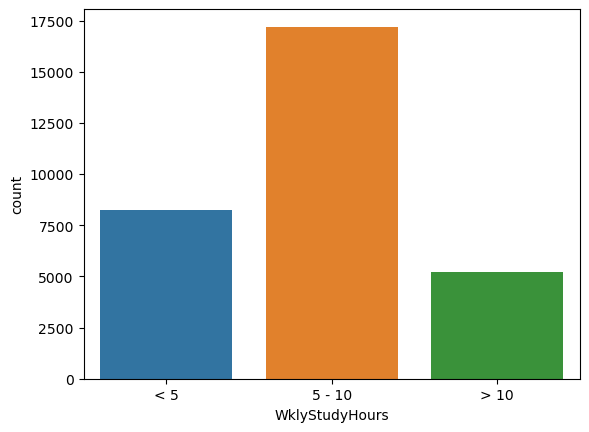

In [49]:
sns.countplot(x='WklyStudyHours', data=df11)

<Axes: xlabel='PracticeSport', ylabel='count'>

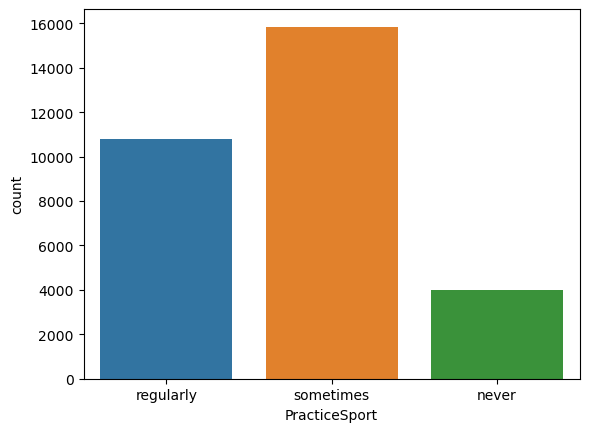

In [50]:
sns.countplot(x='PracticeSport', data=df11)

<Axes: xlabel='IsFirstChild', ylabel='count'>

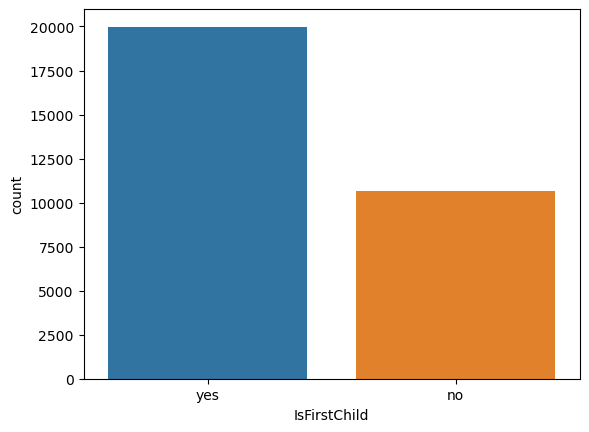

In [51]:
sns.countplot(x='IsFirstChild', data=df11)

<Axes: xlabel='MathScore', ylabel='Gender'>

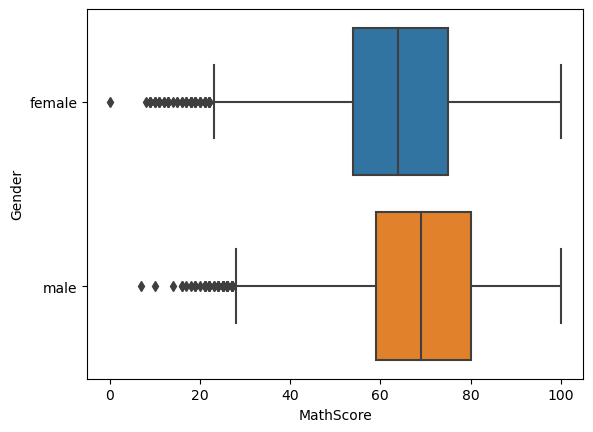

In [52]:
sns.boxplot(x='MathScore', data=df11, y='Gender')

<Axes: xlabel='ReadingScore', ylabel='Gender'>

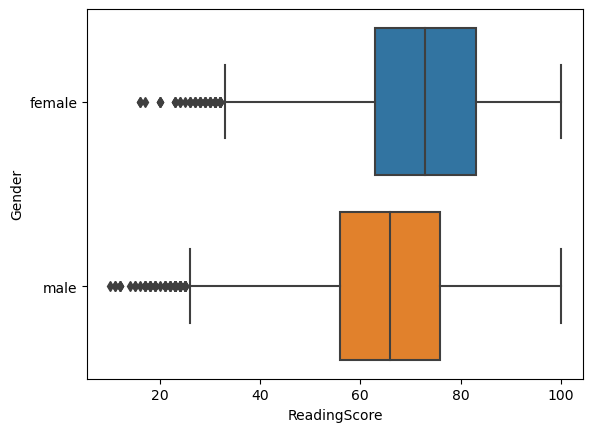

In [53]:
sns.boxplot(x='ReadingScore', data=df11, y='Gender')

<Axes: xlabel='WritingScore', ylabel='Gender'>

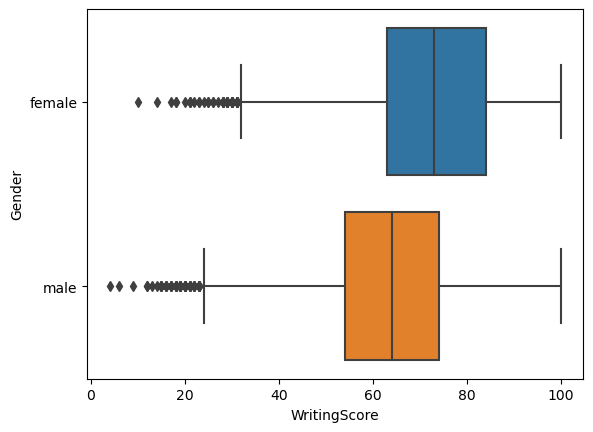

In [54]:
sns.boxplot(x='WritingScore', data=df11, y='Gender')

In [55]:
df11['Average Score'] = round((df11['ReadingScore']+ df11['WritingScore'] + df11['MathScore'])/3, 2)

In [56]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


<Axes: xlabel='Average Score', ylabel='Gender'>

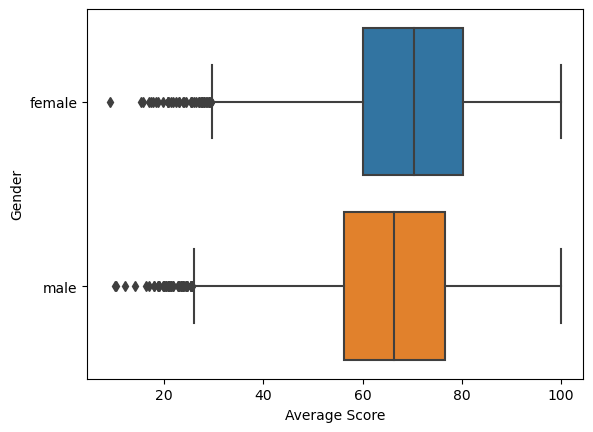

In [57]:
sns.boxplot(x="Average Score", y='Gender', data=df11)

<Axes: xlabel='Average Score', ylabel='EthnicGroup'>

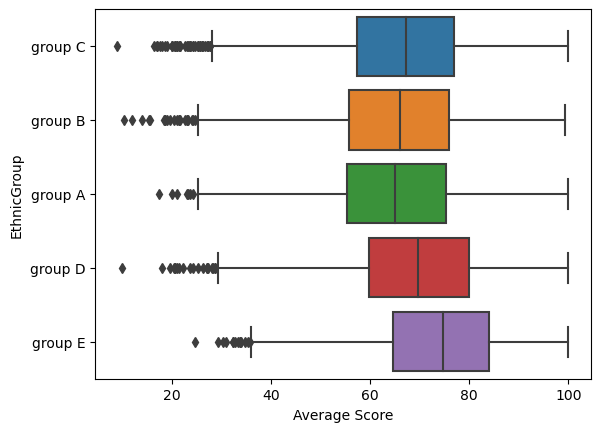

In [58]:
sns.boxplot(x="Average Score", y='EthnicGroup', data=df11)

<Axes: xlabel='Average Score', ylabel='ParentEduc'>

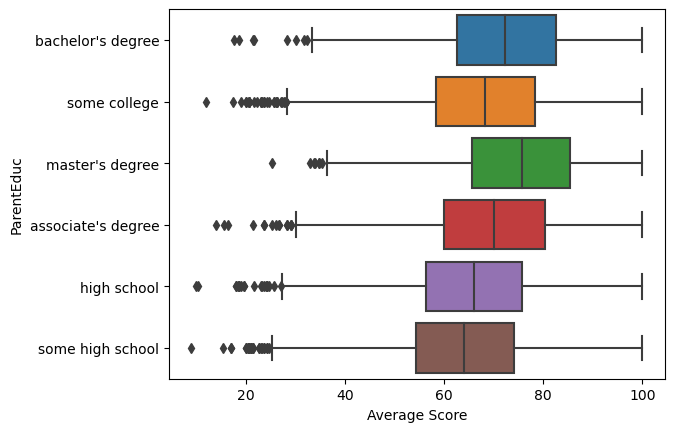

In [59]:
sns.boxplot(x="Average Score", y='ParentEduc', data=df11)

<Axes: xlabel='WklyStudyHours', ylabel='Average Score'>

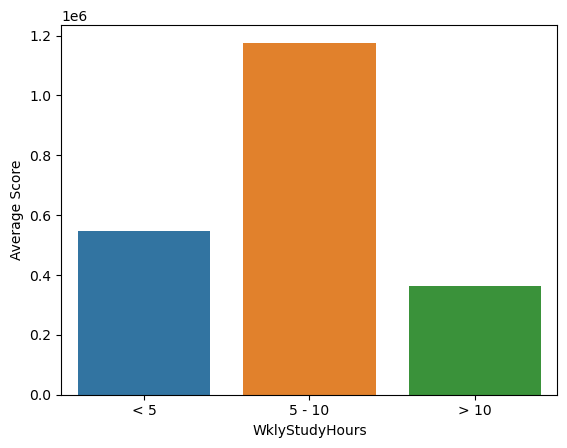

In [60]:
# Using Barplot to descripe the WeeklystudyHrs of the students and their average
sns.barplot(x='WklyStudyHours', y='Average Score', data=df11, estimator='sum', errorbar=None)

In [62]:
pip install empiricaldist

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for empiricaldist: filename=empiricaldist-0.7.2-py3-none-any.whl size=12222 sha256=ad214cff8fde6be9b1bc3c9ae3735bc1f47d20fba36650b47f9fda00fde852b1
  Stored in directory: c:\users\boss\appdata\local\pip\cache\wheels\e1\3b\7b\9e05941453eeac3d404f25bd2afefa929395b35f6de9770be7
Successfully built empiricaldist
Note: you may need to restart the kernel to use updated packages.


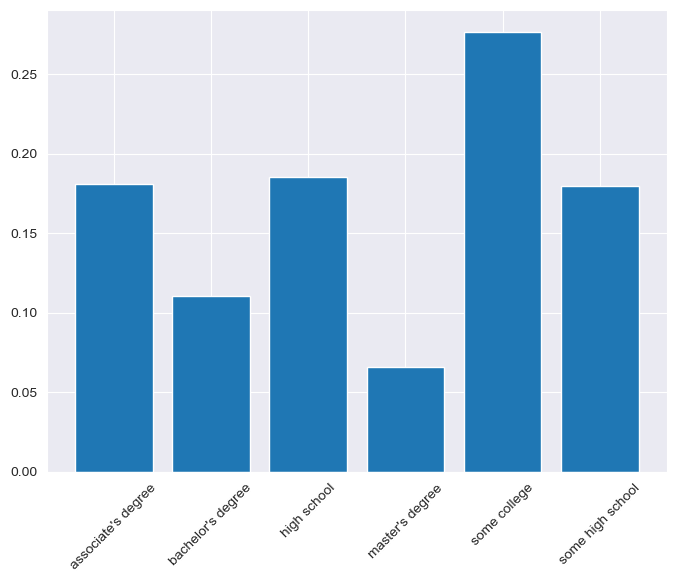

In [69]:
# Whats i the probability that the Parents Education affect students
from empiricaldist import Pmf , Cdf
import seaborn as sns

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8,6))

# perform Bernoulli Distribution using empiricaldist package 
pmf_ParentEdu = Pmf.from_seq(df11['ParentEduc'])
pmf_ParentEdu.bar()
plt.xticks(rotation=45)
plt.show()

In [87]:
df11[['ParentEduc' , 'Average Score']].value_counts(normalize=True).max()

0.003361509089128945

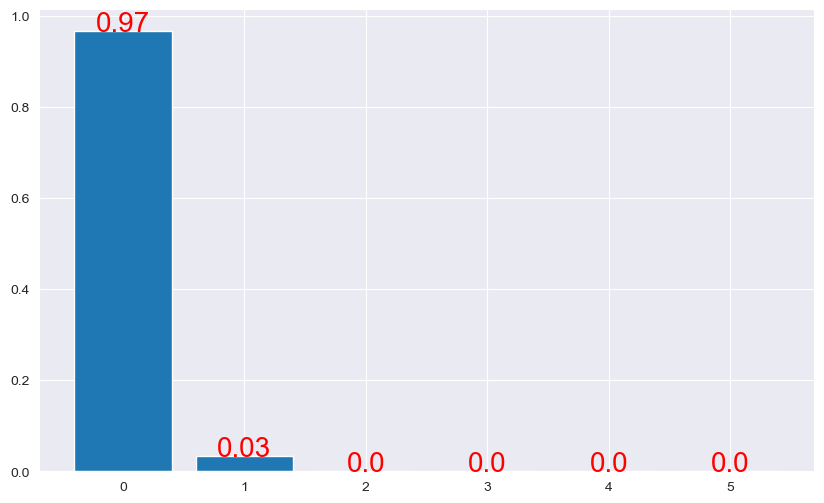

In [133]:
n = 10 
p = 0.00336 # highest average score
x = np.arange(0, 6)

pmf = stats.binom.pmf(x, n, p)
fig, ax = plt.subplots(figsize=(10,6))
pps = plt.bar(x , pmf)
# write percentage on the top of bar 
for w in pps:
    height = w.get_height()
    ax.text(x=w.get_x() + w.get_width() / 2, y=height+.0001 ,
            s="{}".format(round(height ,2)),ha='center' , fontsize=20 , color = 'r')

In [102]:
df11['Average Score'].min()

9.0

In [103]:
df11['Average Score'].max()

100.0

<Axes: xlabel='Average Score', ylabel='WritingScore'>

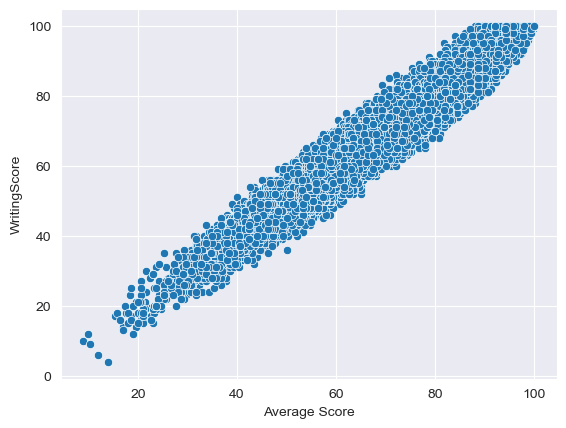

In [101]:
#Using the scatterplot 
#correlation coefficient between Reading and Average score
#the higher the writing score, the higher the average score ie Positive correlation
sns.scatterplot(x='Average Score', y='WritingScore', data=df11)

C:\Users\Boss\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


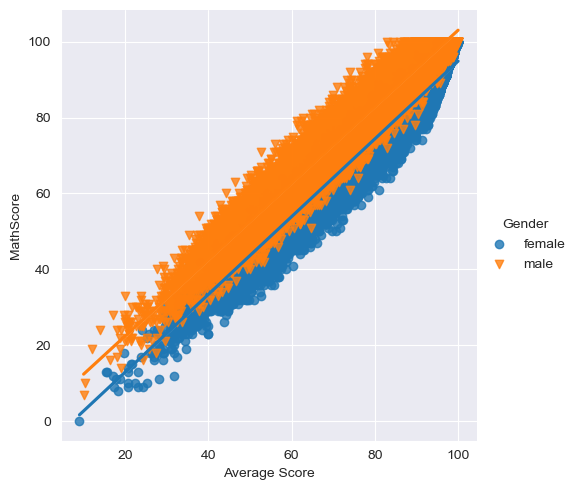

In [94]:
#lmplot as Linear model plot
#correlation coefficient between Math and Average score for the different genders
#the higher the math score, the higher the average score ie Positive correlation but we can see that the male performed better as the toped the female.
sns.lmplot(x='Average Score', y='MathScore', data=df11, hue='Gender', markers=['o', 'v'])

In [129]:
# calculate the percentage of male avarage score in the Student average score
df11[df11['Average Score']==47.67]['Gender'].value_counts(normalize=True)

Gender
male      0.592233
female    0.407767
Name: proportion, dtype: float64

In [130]:
# calculate and plot binomial distribution
n = 10   # sample data
p = 0.592233 # percentage of male average score
x = 5

pmf = stats.binom.pmf(x, n, p)
print(pmf)

0.2069778812230205


In [131]:
cdf = stats.binom.cdf(x, n, p)
print(cdf)

0.3864971178854736


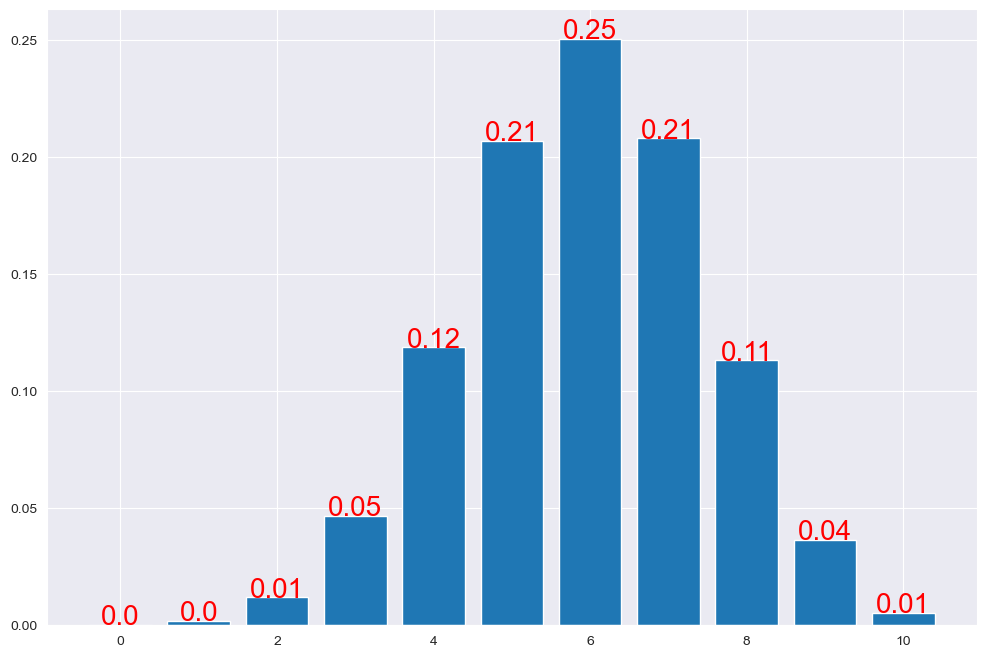

In [132]:
# calculate and plot binomial distribution
n = 10   # sample data
p = 0.592233 # percentage of male average score
x = np.arange(0, 11)

pmf = stats.binom.pmf(x, n, p)
fig, ax = plt.subplots(figsize=(12,8))
pps = plt.bar(x , pmf)
# write percentage on the top of bar 
for w in pps:
    height = w.get_height()
    ax.text(x=w.get_x() + w.get_width() / 2, y=height+.0001 ,
            s="{}".format(round(height ,2)),ha='center' , fontsize=20 , color = 'r')